## This code was adapted from Damion Joyner's Iris2.ipynb repo and some code snippets from Claude (2025)

In [266]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [267]:
ds = pd.read_csv('penguins_size.csv')

In [268]:
## Full EDA

print("Dataset overview:")
print(ds.head())
print("\nData info:")
print(ds.info())
print("\nMissing values:")
print(ds.isna().sum())

Dataset overview:
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   cu

In [269]:
ds2 = ds.dropna()
print(ds2.to_string())

       species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0       Adelie  Torgersen              39.1             18.7              181.0       3750.0    MALE
1       Adelie  Torgersen              39.5             17.4              186.0       3800.0  FEMALE
2       Adelie  Torgersen              40.3             18.0              195.0       3250.0  FEMALE
4       Adelie  Torgersen              36.7             19.3              193.0       3450.0  FEMALE
5       Adelie  Torgersen              39.3             20.6              190.0       3650.0    MALE
6       Adelie  Torgersen              38.9             17.8              181.0       3625.0  FEMALE
7       Adelie  Torgersen              39.2             19.6              195.0       4675.0    MALE
12      Adelie  Torgersen              41.1             17.6              182.0       3200.0  FEMALE
13      Adelie  Torgersen              38.6             21.2              191.0       3800.

In [270]:
ds2.dropna(inplace = True)
print(ds2.to_string())

       species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0       Adelie  Torgersen              39.1             18.7              181.0       3750.0    MALE
1       Adelie  Torgersen              39.5             17.4              186.0       3800.0  FEMALE
2       Adelie  Torgersen              40.3             18.0              195.0       3250.0  FEMALE
4       Adelie  Torgersen              36.7             19.3              193.0       3450.0  FEMALE
5       Adelie  Torgersen              39.3             20.6              190.0       3650.0    MALE
6       Adelie  Torgersen              38.9             17.8              181.0       3625.0  FEMALE
7       Adelie  Torgersen              39.2             19.6              195.0       4675.0    MALE
12      Adelie  Torgersen              41.1             17.6              182.0       3200.0  FEMALE
13      Adelie  Torgersen              38.6             21.2              191.0       3800.

C:\Users\mahab\AppData\Local\Temp\ipykernel_31072\2122527752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2.dropna(inplace = True)


In [271]:
print("Keys of penguin dataset: \n{}".format(ds2.keys()))

Keys of penguin dataset: 
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [272]:
print("Islands: {}".format(ds2['island']))

Islands: 0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 334, dtype: object


In [273]:
print("Sex: \n{}".format(ds2['sex']))

Sex: 
0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 334, dtype: object


In [274]:
print("Type of data: {}".format(type(ds2['body_mass_g'])))

Type of data: <class 'pandas.core.series.Series'>


In [275]:
print("Shape of data: {}".format(ds2['culmen_length_mm'].shape))

Shape of data: (334,)


In [276]:
print("First five columns of data:\n{}".format(ds2['sex'][:5]))

First five columns of data:
0      MALE
1    FEMALE
2    FEMALE
4    FEMALE
5      MALE
Name: sex, dtype: object


In [277]:
print("Type of penguin: {}".format(type(ds2['species'])))

Type of penguin: <class 'pandas.core.series.Series'>


In [278]:
print("Shape of species series: {}".format(ds2['species'].shape))

Shape of species series: (334,)


In [279]:
print("Species:\n{}".format(ds2['species']))

Species:
0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: object


<Figure size 1200x800 with 0 Axes>

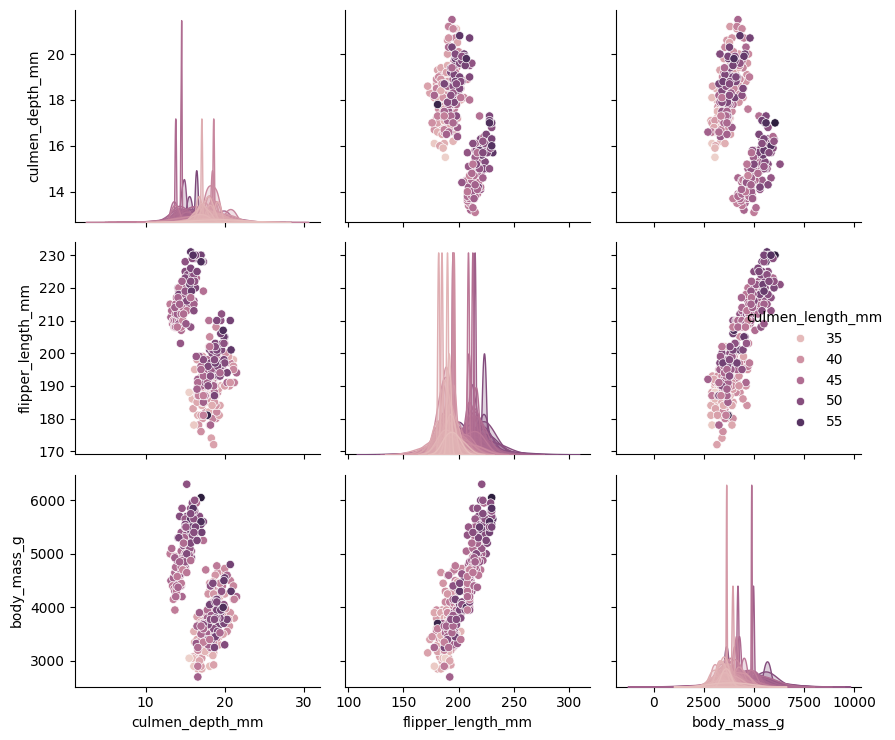

In [280]:
plt.figure(figsize=(12, 8))
sns.pairplot(ds2, hue="culmen_length_mm")
plt.tight_layout()

In [281]:
X = ds2[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = ds2['species']

In [282]:
scaler = StandardScaler()

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [284]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (101, 4)
y_test shape: (101,)


In [285]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [286]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=4, n_neighbors=5, p=2,
weights='uniform')

KNeighborsClassifier(n_jobs=4)

In [287]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [288]:
prediction = knn.predict(X_new)

predicted_species = prediction[0]

print("Prediction: {}".format(predicted_species))

culmen_length = ds2[ds2['species'] == predicted_species]['culmen_length_mm'].mean()

print("Predicted mean culmen length for {}: {}".format(predicted_species, culmen_length))

Prediction: Adelie
Predicted mean culmen length for Adelie: 38.82397260273973


c:\Users\mahab\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [289]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['Chinstrap' 'Gentoo' 'Adelie' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Gentoo'
 'Adelie' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap'
 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap'
 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie'
 'Adelie']


In [290]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.77


In [291]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.77
